# Relatório Parcial

Supercomputação - Cicero Tiago

### Algoritmos

Arquivos Relevantes:

- `process_results.py`
- `tools.py`
- `results.json`
- `entradas/*`

Para os resultados analisados, foi utilizado o script `process_results.py`. Esse script é responsável por gerar arquivos de entrada contendo pares de sequências aleatórias de tamanhos inteiros de 1 a 60 e executar os algoritmos desenvolvidos no projeto com eles. Por fim, os resultados são salvos em um arquivo JSON `results.json`.

Para sequências de tamanho maior que 30, o tempo de execução do **algoritmo de busca exaustiva** começa a crescer bem rapidamente, então o valor limite de tamanho de sequência foi fixado em 60.

Etapas:

1. gera arquivos de entrada;
2. executa cada algoritmo em utilizando cada um dos arquivos de entrada
3. armazena os resultados de tempo e tamanho da entrada.

In [488]:
# -*- encoding :: UTF-8 -*-

import matplotlib.pyplot as plt
import numpy as np
import json

In [489]:
def plot(items, title):
    for group, array in items:
        plt.plot(array[:, 0], array[:, 1], label=group)

    plt.title(title)
    plt.xlabel("Tamanho das entradas")
    plt.ylabel("Tempo de execução (s)")
    plt.legend()
    plt.grid()
    plt.show()

Carrega o arquivo de resultados

In [490]:
with open("results.json", 'r', encoding='utf-8') as results_file:
    results = json.loads(results_file.read())

Formata de modo conveniente para plotar

In [491]:
groups = {}
for group_name, values in results.items():
    groups[group_name] = np.array( [ [ item['input_size'], item['exec_time'] ] for item in results[group_name] ] )

Plotagem de (tamanho de entrada)x(tempo de execução)

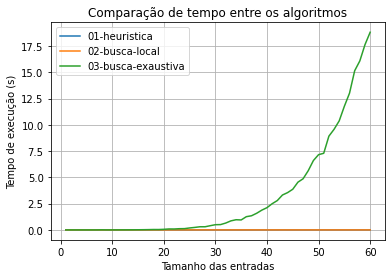

In [492]:
plot(groups.items(), title="Comparação de tempo entre os algoritmos")

Como os tempos de execução para os algoritmos 01 e 02 não são grandes, talvez seja adequado comparar os dois isoladamente

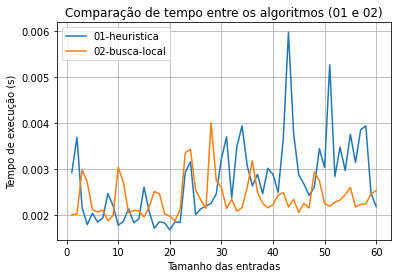

In [493]:
plot(list(groups.items())[:2], title="Comparação de tempo entre os algoritmos (01 e 02)")

---

Para analisar os scripts compilados, foi utilizada a ferramenta de profiling ***valgrind*** conforme o exemplo abaixo, mas o resultado obtido não foi muito esclarecedor a não ser pelo alto número de operações (ordem de bilhões para o algoritmo de busca exaustiva).

```shell
# exemplo
$ valgrind --tool=callgrind ./03-busca-exaustiva/script < entradas/0030x0030.seq
$ callgrind_annotate ./03-busca-exaustiva/callgrind.out.68337 ./03-busca-exaustiva/main.cpp
```

#### Considerações sobre os scripts

Em geral, os scripts desenvolvidos utilizam muitos loops e alguns deles são desnecessários ou realizam tarefas como preparara a saída do programa.

**01 - Heurística de Alinhamento Smith-Waterman**

--

**02 - Busca Local (Aleatorização)**

O código desse algoritmo utiliza uma versão um pouco mais limpa do anterior (descarta chamadas de `std::cout` desnecessárias para a comparação), mas certamente devolve um resultado de qualidade inferior _by design_. Isso poderia ser melhorado se ele fosse executado várias vezes e o melhor dos resultados fosse escolhido.

**03 - Busca Exaustiva**

De longe é, dentre os 3, o que mais realiza operações, pois gera todas as subsequêcias possíveis para cada uma das sequências grandes e utiliza 2 métodos diferentes para comparar cada par de subsquências geradas.

